In [89]:
import BM
import BMH
import KMP
import RK
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

In [90]:
K = [2, 4, 16, 32]
M = [2, 4, 6, 8, 10, 12, 14]

N = 1000

char = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t",
        "u", "v", "x", "w", "y", "z", "A", "B", "C", "D", "E", "F"]

In [91]:
def plot_graph(algorithm,df):
  # Apply a style
  style.use('ggplot')

  # Set a larger figure size for better visibility
  plt.figure(figsize=(10, 6))

  # Plotting
  for k in K:
      y = df[df["K"] == k]["Comparisons"]
      plt.plot(M, y, label=str(k), marker='o', markersize=8, linewidth=2)  # Larger markers and thicker lines

  # Enhancing the title and labels
  plt.title(f'Comparações x Tamanho Padrão {algorithm}', fontsize=16)
  plt.ylabel("Comparações", fontsize=14)
  plt.xlabel("Tamanho do Padrão", fontsize=14)

  # Improving the legend
  plt.legend(title="K", fontsize=12, title_fontsize='13')

  # Adding gridlines
  plt.grid(True, which='both', linestyle='--', linewidth=0.5)

  # Show the plot
  plt.show()

In [92]:
import random

texts = []

for k in K:
    used_char = char[:k]
    for i in range(0,10):
        text = ""
        for k in range(0,1000):
            text += random.choice(used_char)
        texts.append(text)

#[0:9] - padrões de K2
#[10:19] - padrões de K4
#[20:29] - padrões de K16
#[30:39] - padrões de K32

In [93]:
duos = []

for m in M:
    for text in texts:
        pattern = text[len(text)-m:]
        #patterns.append(pattern)
        duos.append((text, pattern))

len(duos)
#print(duos[31])

#[0:9] --> k = 2, m = 2
#[10:19] --> k = 4, m = 2
#[20:29] --> k = 16, m = 2
#[30:39] --> k = 32, m = 2

#[40:49] --> k = 2, m = 4
#[50:59] --> k = 4, m = 4
#[60:69] --> k = 16, m = 4
#[70:79] --> k = 32, m = 4

#[80:89] --> k = 2, m = 6
#[90:99] --> k = 4, m = 6
#[100:109] --> k = 16, m = 6
#[110:119] --> k = 32, m = 6

#[120:129] --> k = 2, m = 8
#[130:139] --> k = 4, m = 8
#[140:149] --> k = 16, m = 8
#[150:159] --> k = 32, m = 8

#[160:169] --> k = 2, m = 10
#[170:179] --> k = 4, m = 10
#[180:189] --> k = 16, m = 10
#[190:199] --> k = 32, m = 10

#[200:209] --> k = 2, m = 12
#[210:219] --> k = 4, m = 12
#[220:229] --> k = 16, m = 12
#[230:239] --> k = 32, m = 12

#[240:249] --> k = 2, m = 14
#[250:259] --> k = 4, m = 14
#[260:269] --> k = 16, m = 14
#[270:279] --> k = 32, m = 14

280

In [94]:
BMH_data = []

val = 0
media = 0

for duo in duos:        
    media += BMH.boyer_moore_horspool_search(duo[0], duo[1])
    val += 1
    if val == 10:
        val = 0
        BMH_data.append(round(media/10000,2))
        media = 0

print(BMH_data)

[1.11, 0.74, 0.54, 0.52, 1.42, 0.5, 0.29, 0.27, 1.47, 0.44, 0.21, 0.19, 1.48, 0.41, 0.17, 0.15, 1.48, 0.41, 0.15, 0.12, 1.47, 0.41, 0.13, 0.11, 1.47, 0.4, 0.12, 0.1]


In [95]:
results = {"Algorithm":[], "K":[], "M":[], "Comparisons":[]}

ind = 0

for m in M:
    for k in K:
        results["Algorithm"].append("BMH")
        results["K"].append(k)
        results["M"].append(m)
        results["Comparisons"].append(BMH_data[ind])
        ind += 1

df = pd.DataFrame(results)
df.head()

,Algorithm,K,M,Comparisons
0,BMH,2,2,1.11
1,BMH,4,2,0.74
2,BMH,16,2,0.54
3,BMH,32,2,0.52
4,BMH,2,4,1.42


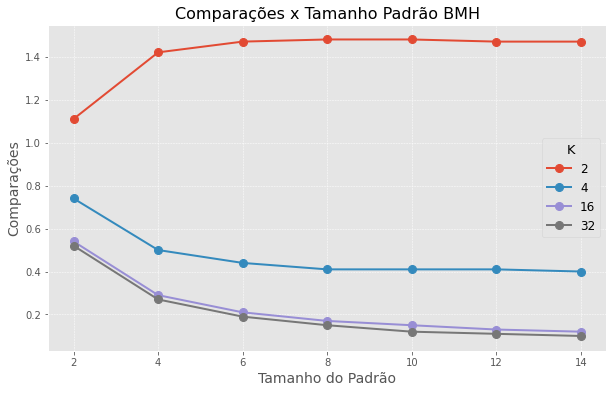

In [96]:
plot_graph("BMH",df)

In [97]:
RK_data = []

val = 0
media = 0

for duo in duos:        
    media += RK.rabin_karp_search(duo[0], duo[1])[0]
    val += 1
    if val == 10:
        val = 0
        RK_data.append(round(media/10000,2))
        media = 0

print(RK_data)

[0.5, 0.13, 0.01, 0.0, 0.24, 0.02, 0.0, 0.0, 0.09, 0.01, 0.01, 0.01, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]


In [98]:
results = {"Algorithm":[], "K":[], "M":[], "Comparisons":[]}

ind = 0

for m in M:
    for k in K:
        results["Algorithm"].append("RK")
        results["K"].append(k)
        results["M"].append(m)
        results["Comparisons"].append(RK_data[ind])
        ind += 1

df = pd.DataFrame(results)
df.head()

,Algorithm,K,M,Comparisons
0,RK,2,2,0.50
1,RK,4,2,0.13
2,RK,16,2,0.01
3,RK,32,2,0.00
4,RK,2,4,0.24


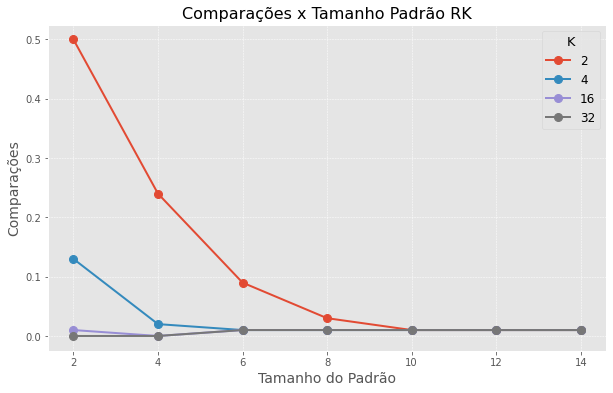

In [99]:
plot_graph("RK",df)

In [100]:
KMP_data = []

val = 0
media = 0

for duo in duos:        
    media += KMP.KMPSearch(duo[1], duo[0])
    val += 1
    if val == 10:
        val = 0
        KMP_data.append(round(media/10000,2))
        media = 0
        
print(KMP_data)

[1.05, 1.01, 1.0, 1.0, 1.04, 1.01, 1.0, 1.0, 1.04, 1.01, 1.0, 1.0, 1.04, 1.01, 1.0, 1.0, 1.05, 1.01, 1.0, 1.0, 1.09, 1.01, 1.0, 1.0, 1.06, 1.01, 1.0, 1.0]


In [101]:
results = {"Algorithm":[], "K":[], "M":[], "Comparisons":[]}

ind = 0

for m in M:
    for k in K:
        results["Algorithm"].append("KMP")
        results["K"].append(k)
        results["M"].append(m)
        results["Comparisons"].append(KMP_data[ind])
        ind += 1

df = pd.DataFrame(results)
df.head()

,Algorithm,K,M,Comparisons
0,KMP,2,2,1.05
1,KMP,4,2,1.01
2,KMP,16,2,1.00
3,KMP,32,2,1.00
4,KMP,2,4,1.04


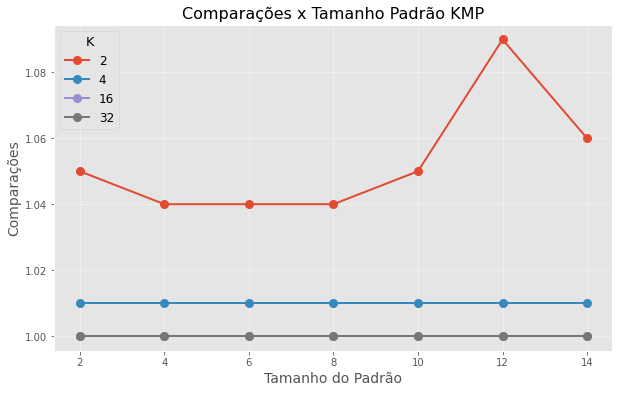

In [102]:
plot_graph("KMP",df)

In [103]:
BM_data = []

val = 0
media = 0

for duo in duos:        
    media += BM.string_search(duo[1], duo[0])[1]
    val += 1
    if val == 10:
        val = 0
        BM_data.append(round(media/10000,2))
        media = 0

print(BM_data)

[0.57, 0.2, 0.03, 0.02, 0.57, 0.14, 0.02, 0.01, 0.51, 0.12, 0.02, 0.01, 0.45, 0.11, 0.02, 0.01, 0.4, 0.11, 0.02, 0.01, 0.37, 0.1, 0.02, 0.01, 0.34, 0.1, 0.02, 0.02]


In [104]:
results = {"Algorithm":[], "K":[], "M":[], "Comparisons":[]}

ind = 0

for m in M:
    for k in K:
        results["Algorithm"].append("BM")
        results["K"].append(k)
        results["M"].append(m)
        results["Comparisons"].append(BM_data[ind])
        ind += 1

df = pd.DataFrame(results)
df.head()

,Algorithm,K,M,Comparisons
0,BM,2,2,0.57
1,BM,4,2,0.20
2,BM,16,2,0.03
3,BM,32,2,0.02
4,BM,2,4,0.57


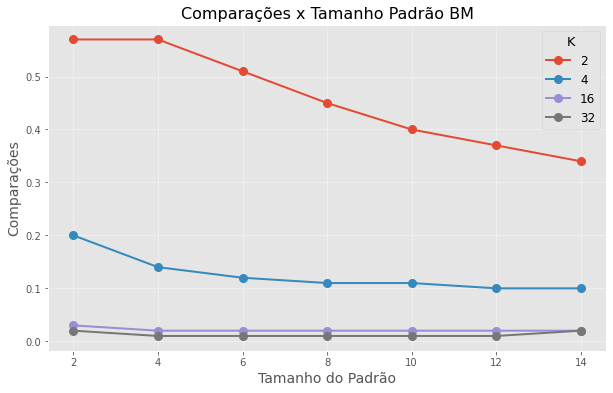

In [105]:
plot_graph("BM",df)

[0] --> k = 2, m = 2

[1] --> k = 4, m = 2

[2] --> k = 16, m = 2

[3] --> k = 32, m = 2

[4] --> k = 2, m = 4

[5] --> k = 4, m = 4

[6] --> k = 16, m = 4

[7] --> k = 32, m = 4

[8] --> k = 2, m = 6

[9] --> k = 4, m = 6

[10] --> k = 16, m = 6

[11] --> k = 32, m = 6

[12] --> k = 2, m = 8

[13] --> k = 4, m = 8

[14] --> k = 16, m = 8

[15] --> k = 32, m = 8

[16] --> k = 2, m = 10

[17] --> k = 4, m = 10

[18] --> k = 16, m = 10

[19] --> k = 32, m = 10

[20] --> k = 2, m = 12

[21] --> k = 4, m = 12

[22] --> k = 16, m = 12

[23] --> k = 32, m = 12

[24] --> k = 2, m = 14

[25] --> k = 4, m = 14

[26] --> k = 16, m = 14

[27] --> k = 32, m = 14